In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import sklearn
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn import naive_bayes
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import warnings
warnings.filterwarnings("ignore")
import ipywidgets as widgets

data = pd.read_csv(r'DataSet\train (1).csv')
print(data.head())


   battery_power  blue  clock_speed  dual_sim  fc  four_g  int_memory  m_dep  \
0            842     0          2.2         0   1       0           7    0.6   
1           1021     1          0.5         1   0       1          53    0.7   
2            563     1          0.5         1   2       1          41    0.9   
3            615     1          2.5         0   0       0          10    0.8   
4           1821     1          1.2         0  13       1          44    0.6   

   mobile_wt  n_cores  ...  px_height  px_width   ram  sc_h  sc_w  talk_time  \
0        188        2  ...         20       756  2549     9     7         19   
1        136        3  ...        905      1988  2631    17     3          7   
2        145        5  ...       1263      1716  2603    11     2          9   
3        131        6  ...       1216      1786  2769    16     8         11   
4        141        2  ...       1208      1212  1411     8     2         15   

   three_g  touch_screen  wifi  price_

In [62]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [63]:
data.isnull().sum()

,0
battery_power,0
blue,0
clock_speed,0
dual_sim,0
fc,0
four_g,0
int_memory,0
m_dep,0
mobile_wt,0
n_cores,0


In [64]:
data.duplicated().sum()

0

In [65]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,...,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,...,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,...,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,...,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,...,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,...,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,...,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,...,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


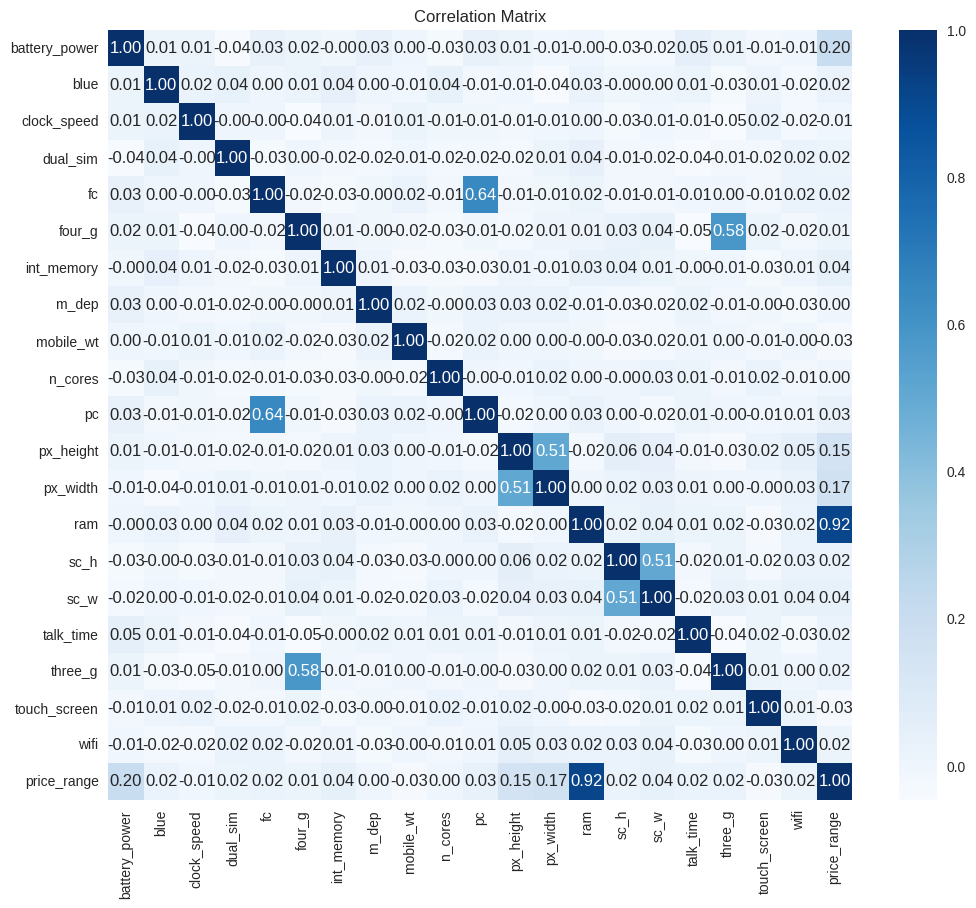

In [66]:
correlation_matrix = data.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap='Blues', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

as we can conclude from correlation matrix that there's a lot of features that don't have as much as importance as others so we need to select the more correlated features

In [67]:
feature_dropdown = widgets.Dropdown(
    options=data.columns,
    value=data.columns[0],
    description="Feature:",
)
def plot_histogram(feature):
    plt.figure(figsize=(8, 6))
    sns.histplot(data[feature], kde=True, color='#80a37f', bins=10)
    plt.title(f'Histogram for {feature}', fontsize=16)
    plt.xlabel(feature, fontsize=14)
    plt.ylabel('Frequency', fontsize=14)
    plt.grid(alpha=0.3)
    plt.show()

widgets.interactive(plot_histogram, feature=feature_dropdown)

interactive(children=(Dropdown(description='Feature:', options=('battery_power', 'blue', 'clock_speed', 'dual_…

In [68]:
def plot_pie_chart(feature):
    plt.figure(figsize=(8, 6))

    # Handle discrete vs continuous features
    if len(data[feature].unique()) > 10:  # Continuous data
        grouped = pd.cut(data[feature], bins=5).value_counts()
        labels = grouped.index.astype(str)
        values = grouped.values
    else:  # Discrete data
        grouped = data[feature].value_counts()
        labels = grouped.index
        values = grouped.values

    # Use a colormap to create a set of colors
    cmap =sns.color_palette("light:b", as_cmap=True)
    colors = [cmap(i / len(values)) for i in range(len(values))]  # Sample colors from the colormap

    # Pie chart
    plt.pie(
        values,
        labels=labels,
        autopct='%1.1f%%',
        startangle=90,
        colors=colors
    )
    plt.title(f'Pie Chart for {feature}', fontsize=16)
    plt.axis('equal')  # Ensures pie is drawn as a circle
    plt.show()

# Call the function
widgets.interactive(plot_pie_chart, feature=feature_dropdown)

interactive(children=(Dropdown(description='Feature:', options=('battery_power', 'blue', 'clock_speed', 'dual_…

As we see here that we make digram check the corelation of each feature wiht the target value which is here price range 

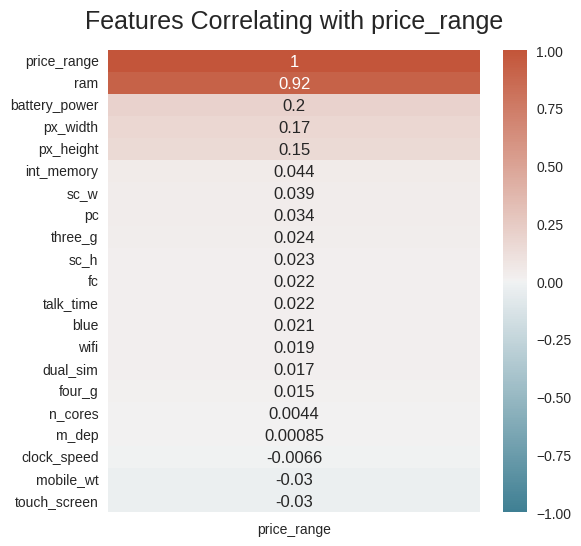

In [69]:
plt.figure(figsize=(6, 6))
heatmap = sns.heatmap(data.corr()[['price_range']].sort_values(by='price_range', ascending=False), vmin=-1, vmax=1, annot=True, cmap=sns.diverging_palette(220, 20, as_cmap=True))
heatmap.set_title('Features Correlating with price_range', fontdict={'fontsize':18}, pad=16);

In [70]:
from ipywidgets import interact
df_box = ['battery_power', 'mobile_wt', 'px_height', 'px_width',
          'ram', 'clock_speed', 'fc', 'int_memory',
          'pc', 'm_dep', 'talk_time']

def display_boxplot(column):
    fig = plt.figure(figsize=(10, 5), facecolor='#b5ae9c')
    box = sns.boxplot(x=column, data=data, color="#b5ae9c", width=0.5, dodge=True)
    box.set_title(f"Boxplot of Column {column}", fontsize=16, color='black')
    box.set(xlabel=None)
    plt.grid()
    plt.show()

# Create dropdown
interact(display_boxplot, column=widgets.Dropdown(options=df_box, description='Select Column:'));

interactive(children=(Dropdown(description='Select Column:', options=('battery_power', 'mobile_wt', 'px_height…

In [71]:
columns = list(data.columns)
columns.remove('price_range')

def plot_graph(x, y):
    f, ax = plt.subplots(figsize=(10, 6))
    sns.despine(bottom=True, left=True)

    sns.stripplot(x=x, y=y, hue='price_range',
                  data=data, dodge=True, jitter=True,
                  alpha=.25, zorder=1)

    handles, labels = ax.get_legend_handles_labels()
    ax.legend(title="Price Range", handletextpad=0, columnspacing=1,
              loc="best", ncol=2, frameon=True)

    plt.title(f"{y} vs {x} with 'price_range'", fontsize=14)
    plt.show()

interact(
    plot_graph,
    x=widgets.Dropdown(options=columns, description='X-axis:'),
    y=widgets.Dropdown(options=columns, value=data.columns[-8] ,description='Y-axis:')
);


interactive(children=(Dropdown(description='X-axis:', options=('battery_power', 'blue', 'clock_speed', 'dual_s…

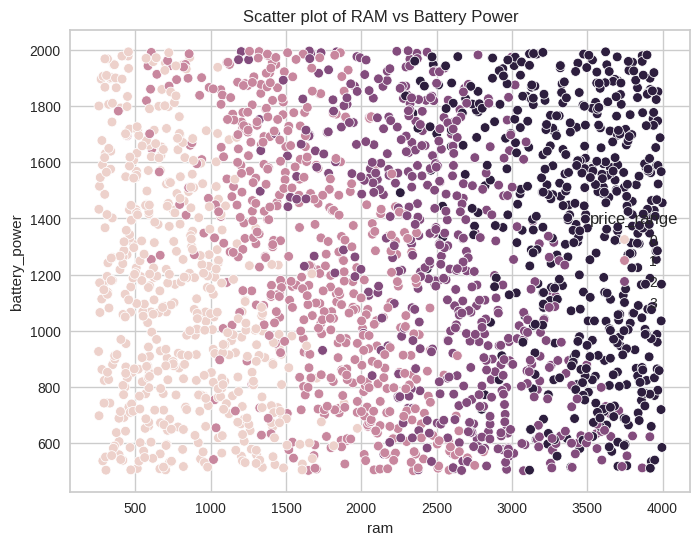

In [72]:
plt.figure(figsize=(8, 6))
sns.scatterplot(data=data, x='ram', y='battery_power', hue='price_range')
plt.title('Scatter plot of RAM vs Battery Power')
plt.show()

In [73]:
x=data.iloc[: , :-1]
y=data['price_range']

sc=StandardScaler()
x=sc.fit_transform(x)

# x = (x-np.min(x))/(np.max(x)-np.min(x))

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3, random_state=42)


here we make cross-validation first we check the best number of folds that we can use in cross-validation and we find it 5 with high score 

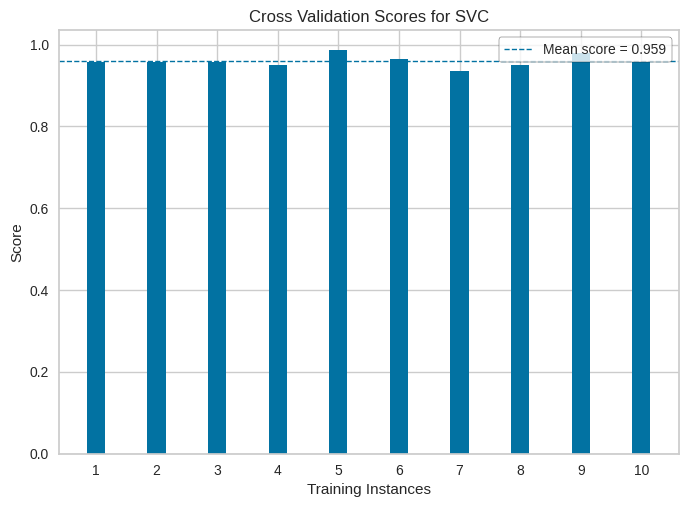

<Axes: title={'center': 'Cross Validation Scores for SVC'}, xlabel='Training Instances', ylabel='Score'>

In [74]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.model_selection import StratifiedKFold
from yellowbrick.model_selection import CVScores
_, ax = plt.subplots()

cv = StratifiedKFold(10)

scores = CVScores(
    SVC(C=100,decision_function_shape="ovo",gamma="auto",kernel="linear",random_state=1), ax=ax, cv=cv, scoring='accuracy'
)
scores.fit(X_train, y_train)
scores.poof()

In [75]:

# Define a range of C values
param_grid = {'C': [0.01, 0.1, 1, 10, 100, 1000]}

# Use SVM with a linear kernel
svc = SVC(kernel='linear', random_state=42)

# Perform grid search with 5-fold cross-validation
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Output the best parameter and the corresponding accuracy
best_C = grid_search.best_params_['C']
best_score = grid_search.best_score_

print("Best C:", best_C)
print("Best Cross-Validation Accuracy:", best_score)


Best C: 100
Best Cross-Validation Accuracy: 0.96


we find that the best parameter is C=100 and the cross-validation score is 0.96 so it it the best parameter 

insights of the code:
#Data is Linearly Separable:
The linear kernel performs very well, indicating that the relationships in the dataset are effectively captured by a linear decision boundary this means that the data are seprated will so th kernel type is linear as data is linear sepraple.
#The cross-validation score and test accuracy are very close (~96.57% vs. 98%), showing no signs of overfitting.

here we use gridsearch to check the best paremeters for convergence of SVM 
1) C 
2) kernel 
3) gamma
to the know the best paremeters to use it in the model 

In [76]:
# Define parameter grid for different kernels
param_grid = {
    'kernel': ["linear", "rbf", "poly", "sigmoid"],  # Test different kernels
    'C': [0.01, 0.1, 0.25, 0.5, 1, 2, 5, 10, 100],       # Regularization parameter
    'gamma': ["scale", "auto", 0.1, 0.01, 0.001],   # For rbf and poly kernels
    'degree': [2, 3]                                # Only for poly kernel
}

# Initialize SVC
svc = SVC(random_state=42)

# Perform GridSearchCV on sampled data
grid_search = GridSearchCV(estimator=svc, param_grid=param_grid, cv=5, scoring='accuracy')
grid_search.fit(X_train, y_train)

# Best parameters and accuracy
print("Best Parameters from Grid Search:", grid_search.best_params_)
print("Best Cross-Validation Score:", grid_search.best_score_)

# Test the best model on the test set
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print("Classification Report for Tuned SVM:")
print(classification_report(y_test, y_pred))

Best Parameters from Grid Search: {'C': 100, 'degree': 2, 'gamma': 'scale', 'kernel': 'linear'}
Best Cross-Validation Score: 0.96
Classification Report for Tuned SVM:
              precision    recall  f1-score   support

           0       1.00      0.97      0.98       151
           1       0.94      1.00      0.97       146
           2       0.98      0.95      0.97       148
           3       0.98      0.98      0.98       155

    accuracy                           0.97       600
   macro avg       0.98      0.98      0.97       600
weighted avg       0.98      0.97      0.98       600



**The regularization parameter 𝐶**

is set to a high value (C=100), indicating that the model prioritizes minimizing misclassification errors over maximizing the margin between classes. This suggests a focus on achieving a tighter fit to the training data, which can be beneficial if the data is well-separated and noise is minimal.

**Kernel = Linear:**

The linear kernel was chosen as the best kernel, suggesting that the decision boundary between the classes is linear or can be effectively approximated as linear. This is simpler than non-linear kernels and computationally efficient, making it suitable for datasets where relationships between classes do not require complex transformations.

**The cross-validation score of 0.96**

demonstrates that the model performs consistently well across multiple folds of training data. This high score reflects strong generalization ability, indicating the model is unlikely to overfit and will likely perform well on unseen data.

**Performance Metrics:**

**Recall:**

Class 0: Recall is 0.97, meaning 97% of actual class 0 instances were correctly predicted.

Class 1: Recall is 1.00, meaning all actual class 1 instances were predicted correctly.

Class 2: Recall is 0.95, meaning 95% of actual class 2 instances were predicted correctly.

Class 3: Recall is 0.98, meaning 98% of actual class 3 instances were correctly predicted.

**Precision:**

Class 0: Precision is 1.00, meaning 100% of predicted class 0 instances are correct.

Class 1: Precision is 0.94, indicating that while good, there is a small number of misclassified instances.

Class 2: Precision is 0.98, meaning the majority of predicted instances for this class are correct.

Class 3: Precision is 0.98, which is very good and reflects minimal misclassification.

**F1-scores**
 for all classes are high, particularly for Classes 0 and 3, demonstrating a balanced performance between precision and recall. These metrics confirm the robustness of the model for this classification task.


1-Hyperparameter tuning is the process of finding the optimal values for parameters that control the SVM's behavior.
(such as C and kernel)

(a) C importance:determines the trade-off between:
    - maximizing the margin between classes
    - minimizing the misclassification error
    
(b) kernel importance:
    - choosing a kernel that suits the data effectively
    The kernel parameter in Support Vector Machines (SVM) determines how the input data is transformed into a higher-dimensional space to make it easier to find a decision boundary that separates the data
    
2-GridSearchCV helps find the optimal values for these parameters systematically, ensuring the model performs its best.
so here we fond that the best c is Best C: 100

In [77]:
from sklearn.inspection import permutation_importance

# Perform permutation importance
result = permutation_importance(best_model, X_test, y_test, n_repeats=10, random_state=42)

# Display feature importances
importances = result.importances_mean
indices = importances.argsort()

# Print the top 5 important features
print("Top 5 Important Features:")
for idx in indices[-5:]:
    print(f"{data.columns[idx]}: {importances[idx]}")

Top 5 Important Features:
mobile_wt: 0.02366666666666665
px_height: 0.12716666666666665
px_width: 0.1308333333333333
battery_power: 0.22316666666666665
ram: 0.7076666666666667


here we found that there is some important features and i use this library to check the importance of them to use them in the model for better accuracy.

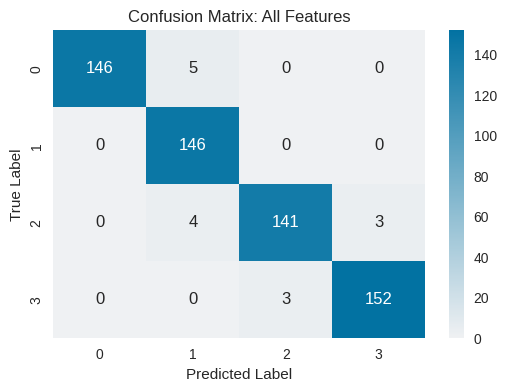

,precision,recall,f1-score
0,1.000000,0.966887,0.983165
1,0.941935,1.000000,0.970100
2,0.979167,0.952703,0.965753
3,0.980645,0.980645,0.980645
accuracy,0.975000,0.975000,0.975000
macro avg,0.975437,0.975059,0.974916
weighted avg,0.975732,0.975000,0.975040


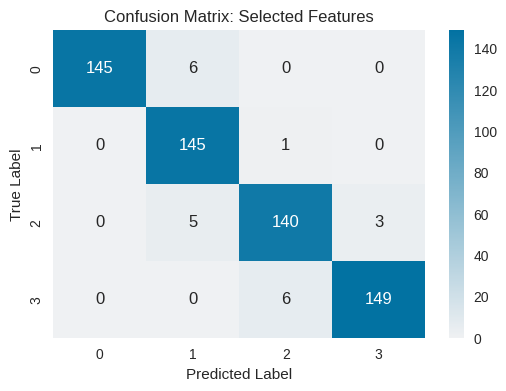

,precision,recall,f1-score
0,1.000000,0.960265,0.979730
1,0.929487,0.993151,0.960265
2,0.952381,0.945946,0.949153
3,0.980263,0.961290,0.970684
accuracy,0.965000,0.965000,0.965000
macro avg,0.965533,0.965163,0.964958
weighted avg,0.965997,0.965000,0.965114


In [110]:
model = SVC(kernel='linear', C=100, degree=2, gamma='scale', random_state=42)

# Train the model using all features
X_train = pd.DataFrame(X_train, columns=columns)
X_test = pd.DataFrame(X_test, columns=columns)
X_train_all = X_train  # All features
X_test_all = X_test    # All features
model.fit(X_train_all, y_train)
y_pred_all = model.predict(X_test_all)
report_all = classification_report(y_test, y_pred_all, output_dict=True)

# Train the model using selected features (from permutation importance)
X_train_selected = X_train[['ram', 'battery_power', 'px_height','px_width']]
X_test_selected = X_test[['ram', 'battery_power', 'px_height', 'px_width']]
model.fit(X_train_selected, y_train)
y_pred_selected = model.predict(X_test_selected)
report_selected = classification_report(y_test, y_pred_selected, output_dict=True)

# Convert reports into DataFrame for comparison
report_all_df = pd.DataFrame(report_all).T
report_selected_df = pd.DataFrame(report_selected).T

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 4))
    sns.heatmap(cm, annot=True, fmt='d', cmap=sns.color_palette("light:b", as_cmap=True))
    plt.title(title)
    plt.ylabel('True Label')
    plt.xlabel('Predicted Label')
    plt.show()

comparison_df = pd.concat([report_all_df[['precision', 'recall', 'f1-score']],
                           report_selected_df[['precision', 'recall', 'f1-score']]],
                          axis=1,
                          keys=['All Features', 'Selected Features'])

plot_confusion_matrix(y_test, y_pred_all, "Confusion Matrix: All Features")
All_Features = report_all_df[['precision', 'recall', 'f1-score']].style.set_caption("All Features")
display(All_Features)
plot_confusion_matrix(y_test, y_pred_selected, "Confusion Matrix: Selected Features")
Selected_Features = report_selected_df[['precision', 'recall', 'f1-score']].style.set_caption("Selected Features")
display(Selected_Features)




In [127]:
from sklearn.svm import SVC
from ipywidgets import interactive
from matplotlib.colors import ListedColormap

X = np.array(data.iloc[:,[0,13]])
Y = np.array(data['price_range'])
sc=StandardScaler()
X=sc.fit_transform(X)

# cmap_dark = plt.cm.PuBu_r
# cmap_bright = ListedColormap(plt.cm.PuBu_r(np.linspace(0.3, 1, 4)))
cmap_dark = sns.color_palette("light:b", as_cmap=True).reversed()
discrete_colors = cmap_dark(np.linspace(0.3, 1, 4))
cmap_bright = ListedColormap(discrete_colors)

# Function to Plot Decision Boundary
def plot_decision_boundary(kernel="linear", C_param=1.0):
    h = 0.02  # Step size for mesh grid

    # Initialize and train the SVC model
    clf = SVC(kernel=kernel, C=C_param)
    clf.fit(X, Y)

    # Create a mesh grid
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    # Predict on the grid points
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary and scatter points
    plt.figure(figsize=(8, 6))
    plt.pcolormesh(xx, yy, Z, cmap=cmap_dark, shading="auto")
    plt.scatter(X[:, 0], X[:, 1], c=Y, cmap=cmap_bright, edgecolor="k", s=20)
    plt.title(f"Decision Boundary (kernel = {kernel}, C = {C_param})")
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.show()

# Interactive Widget
interactive_plot = interactive(
    plot_decision_boundary,
    kernel=["linear", "rbf", "poly", "sigmoid"],
    C_param=(0.01, 100.0, 0.01)
)

interactive_plot

interactive(children=(Dropdown(description='kernel', options=('linear', 'rbf', 'poly', 'sigmoid'), value='line…

In [118]:
import plotly.express as px
import plotly.io as pio


X = data[['battery_power', 'ram']]
y = data['price_range']
sc=StandardScaler()
X=sc.fit_transform(X)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_test_with_target = np.concatenate((X_test, y_test.values.reshape(-1, 1)), axis=1)
X_test_with_target = pd.DataFrame(X_test_with_target, columns=['battery_power', 'ram', 'price_range'])


svc = SVC(kernel='linear', C=100, degree=2, gamma='scale', random_state=42)
svc.fit(X_train, y_train)


predictions = svc.predict(X_test)


X_test_with_target['Predicted'] = predictions.astype(str)

color_map = { '0': 'red', '1': 'green', '2': 'blue', '3': 'orange' }


fig = px.scatter_3d(
    data_frame=X_test_with_target,
    x='battery_power',
    y='ram',
    z='price_range',
    color='Predicted',
    color_discrete_map=color_map,
    template='ggplot2',
    opacity=0.7,
    height=700,
    title='3D Visualization of SVC Predictions'
)


pio.show(fig)

# Naive Bayes
In the Exploratory Data Analysis (EDA), we found that our dataset contains continuous, discrete, and binary features. Let's explore how to apply different variants of Naive Bayes based on the type of feature:



*   **Gaussian Naive Bayes** for continuous and discrete features.
*   **Multinomial Naive Bayes** for discrete features.
*   **Bernoulli Naive Bayes** for binary features.









In [80]:
import ipywidgets as widgets
from IPython.display import display
binary_features = ['blue', 'dual_sim', 'four_g', 'three_g', 'touch_screen', 'wifi']
continuous_features = ['battery_power', 'clock_speed', 'm_dep', 'mobile_wt',
                       'px_height', 'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'fc', 'int_memory', 'n_cores', 'pc']
discrete_features = ['fc', 'int_memory', 'n_cores', 'pc']

def plot_feature_distributions(data, features, feature_type, hue='price_range'):
    n_features = len(features)
    ncols = 4
    nrows = (n_features + ncols - 1) // ncols

    fig, axes = plt.subplots(nrows=nrows, ncols=ncols, figsize=(15, 5 * nrows))
    fig.tight_layout(pad=5.0)

    axes = axes.flatten()

    for i, feature in enumerate(features):
        ax = axes[i]
        if feature_type == 'binary' or feature_type == 'discrete':
            sns.countplot(x=feature, hue=hue, data=data, palette=sns.light_palette("seagreen", as_cmap=True), ax=ax)
        elif feature_type == 'continuous':
            sns.kdeplot(x=feature, hue=hue, data=data, fill=True, palette="Set2", common_norm=False, ax=ax)

        ax.set_title(f"{feature}")
        ax.set_xlabel(feature)
        ax.set_ylabel("Count/Density")

    # Remove excess empty subplots
    for i in range(n_features, len(axes)):
        fig.delaxes(axes[i])

    plt.show()

# Function to display selected plot type
def display_plots(plot_group):
    if plot_group == 'Binary Features':
        plot_feature_distributions(data, binary_features, 'binary')
    elif plot_group == 'Continuous Features':
        plot_feature_distributions(data, continuous_features, 'continuous')
    elif plot_group == 'Discrete Features':
        plot_feature_distributions(data, discrete_features, 'discrete')

# Create dropdown widget for user selection
dropdown = widgets.Dropdown(
    options=['Binary Features', 'Continuous Features', 'Discrete Features'],
    description='Select Plot Group:',
    disabled=False
)

widgets.interactive(display_plots, plot_group=dropdown)

interactive(children=(Dropdown(description='Select Plot Group:', options=('Binary Features', 'Continuous Featu…

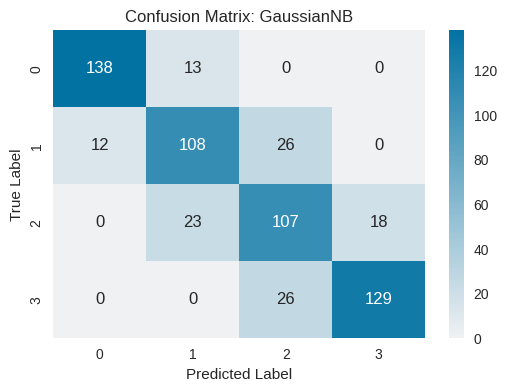

,precision,recall,f1-score,support
0,0.920000,0.913907,0.916944,151.000000
1,0.750000,0.739726,0.744828,146.000000
2,0.672956,0.722973,0.697068,148.000000
3,0.877551,0.832258,0.854305,155.000000
accuracy,0.803333,0.803333,0.803333,0.803333
macro avg,0.805127,0.802216,0.803286,600.000000
weighted avg,0.806730,0.803333,0.804644,600.000000


In [111]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.preprocessing import MinMaxScaler
X_continuous = data[continuous_features]

sc=MinMaxScaler()
X_continuous=sc.fit_transform(X_continuous)
X_train_continuous, X_test_continuous, y_train, y_test = train_test_split(X_continuous, y, test_size=0.3, random_state=42)

gnb = GaussianNB()
gnb.fit(X_train_continuous, y_train)
y_pred = gnb.predict(X_test_continuous)
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix: GaussianNB")
report  = classification_report(y_test, y_pred,  output_dict=True)
report_df = pd.DataFrame(report)
GaussianNB_report= report_df.T.style.set_caption("GaussianNB")
display(GaussianNB_report)


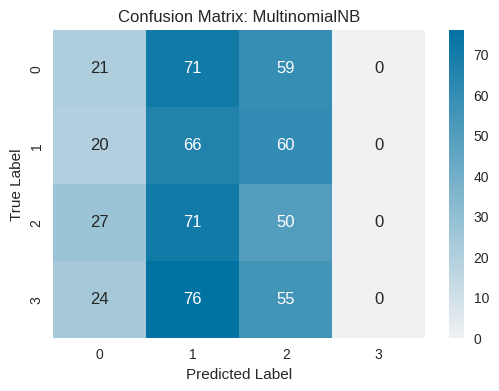

,precision,recall,f1-score,support
0,0.228261,0.139073,0.172840,151.000000
1,0.232394,0.452055,0.306977,146.000000
2,0.223214,0.337838,0.268817,148.000000
3,0.000000,0.000000,0.000000,155.000000
accuracy,0.228333,0.228333,0.228333,0.228333
macro avg,0.170967,0.232241,0.187158,600.000000
weighted avg,0.169054,0.228333,0.184504,600.000000


In [112]:
X_discrete = data[discrete_features]

sc=MinMaxScaler()
X_discrete=sc.fit_transform(X_discrete)
X_train_discrete, X_test_discrete, y_train, y_test = train_test_split(X_discrete, y, test_size=0.3, random_state=42)

mnb = MultinomialNB()
mnb.fit(X_train_discrete, y_train)

y_pred = mnb.predict(X_test_discrete)

plot_confusion_matrix(y_test, y_pred, "Confusion Matrix: MultinomialNB")
report  = classification_report(y_test, y_pred,  output_dict=True)
report_df = pd.DataFrame(report)
MultinomialNB_report= report_df.T.style.set_caption("MultinomialNB")
display(MultinomialNB_report)


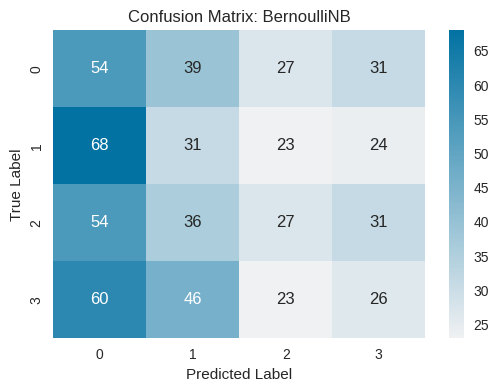

,precision,recall,f1-score,support
0,0.228814,0.357616,0.279070,151.000000
1,0.203947,0.212329,0.208054,146.000000
2,0.270000,0.182432,0.217742,148.000000
3,0.232143,0.167742,0.194757,155.000000
accuracy,0.230000,0.230000,0.230000,0.230000
macro avg,0.233726,0.230030,0.224905,600.000000
weighted avg,0.233782,0.230000,0.224881,600.000000


In [113]:
X_binary = data[binary_features]

sc=MinMaxScaler()
X_binary=sc.fit_transform(X_binary)
X_train_binary, X_test_binary, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)
bnb = BernoulliNB()
bnb.fit(X_train_binary, y_train)

y_pred = bnb.predict(X_test_binary)
plot_confusion_matrix(y_test, y_pred, "Confusion Matrix: BernoulliNB")
report  = classification_report(y_test, y_pred,  output_dict=True)
report_df = pd.DataFrame(report)
BernoulliNB_report= report_df.T.style.set_caption("BernoulliNB")
display(BernoulliNB_report)

In [108]:
cmap_dark = plt.cm.PuBuGn_r
cmap_bright = ListedColormap(plt.cm.PuBuGn_r(np.linspace(0.3, 1, 4)))
def plot_decision_boundary(nb_type):
    if nb_type == 'GaussianNB':
        features = continuous_features
        X_train, X_test, y_train, y_test = train_test_split(X_continuous, y, test_size=0.3, random_state=42)
        X_train = np.array(X_train)[:, [0, 6]]
        y_train = np.array(y_train)
        model = GaussianNB()
    elif nb_type == 'MultinomialNB':
        features = discrete_features
        X_train, X_test, y_train, y_test = train_test_split(X_discrete, y, test_size=0.3, random_state=42)
        X_train = np.array(X_train)[:, :2]
        y_train = np.array(y_train)
        model = MultinomialNB()
    elif nb_type == 'BernoulliNB':
        features = binary_features
        X_train, X_test, y_train, y_test = train_test_split(X_binary, y, test_size=0.3, random_state=42)
        X_train = np.array(X_train)[:, :2]
        y_train = np.array(y_train)
        model = BernoulliNB()

    # Fit the model
    model.fit(X_train, y_train)

    # Mesh grid for decision boundary, restricted to [0, 1] range
    x_min, x_max = 0, 1
    y_min, y_max = 0, 1
    xx, yy = np.meshgrid(np.linspace(x_min, x_max, 500),
                         np.linspace(y_min, y_max, 500))

    # Predictions on the mesh grid
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    # Plot decision boundary
    plt.figure(figsize=(8, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap_dark)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=cmap_bright, s=20)
    plt.xlim(0, 1)  # Ensure x-axis range is [0, 1]
    plt.ylim(0, 1)  # Ensure y-axis range is [0, 1]
    plt.title(f'Decision Boundary for {nb_type}')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()
# Dropdown widget
interact(plot_decision_boundary, nb_type=widgets.Dropdown(
    options=['GaussianNB', 'MultinomialNB', 'BernoulliNB'],
    value='GaussianNB',
    description='NB Type:',
    style={'description_width': 'initial'}
))

interactive(children=(Dropdown(description='NB Type:', options=('GaussianNB', 'MultinomialNB', 'BernoulliNB'),…

<function __main__.plot_decision_boundary(nb_type)>


From this, we can conclude that Gaussian Naive Bayes performs better for this dataset. This is because most of the features are normally distributed.

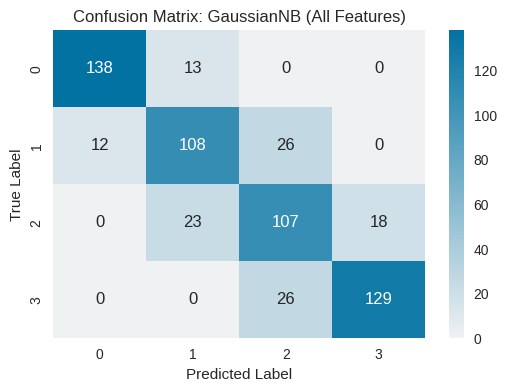

,precision,recall,f1-score,support
0,0.920000,0.913907,0.916944,151.000000
1,0.750000,0.739726,0.744828,146.000000
2,0.672956,0.722973,0.697068,148.000000
3,0.877551,0.832258,0.854305,155.000000
accuracy,0.803333,0.803333,0.803333,0.803333
macro avg,0.805127,0.802216,0.803286,600.000000
weighted avg,0.806730,0.803333,0.804644,600.000000


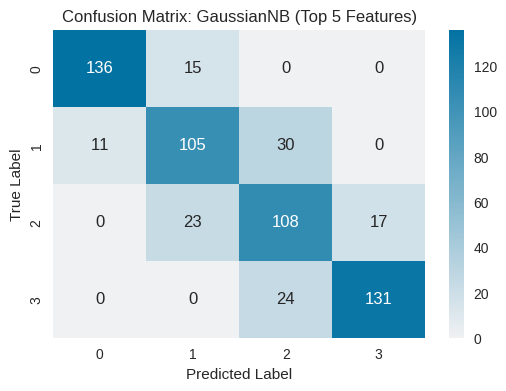

,precision,recall,f1-score,support
0,0.925170,0.900662,0.912752,151.000000
1,0.734266,0.719178,0.726644,146.000000
2,0.666667,0.729730,0.696774,148.000000
3,0.885135,0.845161,0.864686,155.000000
accuracy,0.800000,0.800000,0.800000,0.800000
macro avg,0.802809,0.798683,0.800214,600.000000
weighted avg,0.804610,0.800000,0.801774,600.000000


In [115]:
gnb_full = GaussianNB()
gnb_full.fit(X_train_continuous, y_train)
y_pred_full = gnb_full.predict(X_test_continuous)

plot_confusion_matrix(y_test, y_pred_full, "Confusion Matrix: GaussianNB (All Features)")
report_full = classification_report(y_test, y_pred_full, output_dict=True)
report_df_full = pd.DataFrame(report_full)
GaussianNB_full_report = report_df_full.T.style.set_caption("GaussianNB (All Features)")
display(GaussianNB_full_report)

top5_features = ['mobile_wt', 'px_height', 'px_width', 'battery_power', 'ram']
X_selected = data[top5_features]
X_selected = sc.fit_transform(X_selected)
X_train_selected, X_test_selected, _, _ = train_test_split(X_selected, y, test_size=0.3, random_state=42)

gnb_selected = GaussianNB()
gnb_selected.fit(X_train_selected, y_train)
y_pred_selected = gnb_selected.predict(X_test_selected)

# Confusion Matrix and Report for Selected Features
plot_confusion_matrix(y_test, y_pred_selected, "Confusion Matrix: GaussianNB (Top 5 Features)")
report_selected = classification_report(y_test, y_pred_selected, output_dict=True)
report_df_selected = pd.DataFrame(report_selected)
GaussianNB_selected_report = report_df_selected.T.style.set_caption("GaussianNB (Top 5 Features)")
display(GaussianNB_selected_report)

In [116]:
import plotly.express as px
import plotly.io as pio


X = data[['battery_power', 'ram']]
y = data['price_range']


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)


X_test_with_target = np.concatenate((X_test, y_test.values.reshape(-1, 1)), axis=1)
X_test_with_target = pd.DataFrame(X_test_with_target, columns=['battery_power', 'ram', 'price_range'])


gnb = GaussianNB()
gnb.fit(X_train, y_train)


predictions = gnb.predict(X_test)


X_test_with_target['Predicted'] = predictions.astype(str)

# Define color mapping: e.g., '0' -> 'red', '1' -> 'green', etc.
color_map = { '0': 'red', '1': 'green', '2': 'blue', '3': 'orange' }

fig = px.scatter_3d(
    data_frame=X_test_with_target,
    x='battery_power',
    y='ram',
    z='price_range',
    color='Predicted',
    color_discrete_map=color_map,
    template='ggplot2',
    opacity=0.7,
    height=700,
    title='3D Visualization of GaussianNB Predictions'
)

pio.show(fig)
